In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk import FreqDist

from textblob import Word

from sklearn.model_selection import train_test_split
from nltk.tokenize.casual import TweetTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yizhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yizhe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

from sklearn.metrics import accuracy_score


Using TensorFlow backend.


In [3]:
Data_random_tweet = pd.read_csv('Data\election_day_tweets.csv', na_values=[' '])

In [4]:
Data_random_tweet.head()

,text,created_at,geo,lang,place,coordinates,user.favourites_count,user.statuses_count,user.description,user.location,...,user.geo_enabled,user.profile_background_color,user.profile_image_url,user.time_zone,id,favorite_count,retweeted,source,favorited,retweet_count
0,.@Lawrence @HillaryClinton Two first @SenSchu...,2016-11-08 04:04:37,NaN,en,NaN,NaN,18882,26939,"The Specialist, Copyrighted TX0008044160 #Surv...",WorldWide 80Million StealthRUs,...,True,131516,http://pbs.twimg.com/profile_images/7878871945...,America/Los_Angeles,795839414735732737,11,False,Twitter for Android,False,8
1,My @latimesopinion op-ed on historic #Californ...,2016-11-08 04:08:10,NaN,en,NaN,NaN,8,4841,Hoover Institution research fellow; https://t....,"Palo Alto, California",...,True,C0DEED,http://pbs.twimg.com/profile_images/6514470051...,Pacific Time (US & Canada),795840310597193728,3,False,Twitter Web Client,False,4
2,#Senate Wisconsin Senate Preview: Johnson vs. ...,2016-11-08 04:11:35,NaN,en,NaN,NaN,728,160390,US SENATE NEWS FEED. The U.S. Senate is the w...,USA,...,False,473969,http://pbs.twimg.com/profile_images/6155877017...,Alaska,795841168621719552,0,False,dlvr.it,False,0
3,If Rubio Wins and #Trump Loses in #Florida... ...,2016-11-08 04:12:16,NaN,en,NaN,NaN,0,18105,The most trending Marco Rubio news as collecte...,Washington DC,...,False,C0DEED,http://pbs.twimg.com/profile_images/5890065307...,NaN,795841341146234880,0,False,Lead Stories Feed Publisher,False,0
4,#Senate Wisconsin Senate Preview: Johnson vs. ...,2016-11-08 04:16:20,NaN,en,NaN,NaN,4722,247322,News & #ALERTS. We are a large group of proud ...,24hr Live HD Stream Broadcast,...,False,1B95E0,http://pbs.twimg.com/profile_images/7971276617...,Eastern Time (US & Canada),795842365881782272,0,False,IFTTT,False,0


In [5]:
New_data = Data_random_tweet.dropna(subset =['user.location']) # only keep those with location
New_data['text'].head()

0    .@Lawrence @HillaryClinton Two first  @SenSchu...
1    My @latimesopinion op-ed on historic #Californ...
2    #Senate Wisconsin Senate Preview: Johnson vs. ...
3    If Rubio Wins and #Trump Loses in #Florida... ...
4    #Senate Wisconsin Senate Preview: Johnson vs. ...
Name: text, dtype: object

In [6]:
New_data['text'] = New_data['text'].apply(lambda x: " ".join(x.lower() for x in x.split())) # convert all to lower case
New_data['text'] = New_data['text'].str.replace('[^\w\s]','') #  remove punctuation
stop = stopwords.words('english')
New_data['text'] = New_data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #remove stop words

freq = pd.Series(' '.join(New_data['text']).split()).value_counts()[:20]
freq = list(freq.index)
New_data['text']= New_data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq)) # remove common words

freq = pd.Series(' '.join(New_data['text']).split()).value_counts()[-100:] # remove rare words
freq = list(freq.index)
New_data['text'] = New_data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

c:\users\yizhe\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\yizhe\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\yizhe\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [8]:
# Lemmatization
New_data['text'] = New_data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
New_data['text'].head()

c:\users\yizhe\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    lawrence two first senschumer tomorrow thelast...
1    latimesopinion oped historic california race f...
2    wisconsin preview johnson v feingold sequel ht...
3    rubio loses florida republicanprimary senatera...
4    wisconsin preview johnson v feingold sequel ht...
Name: text, dtype: object

In [9]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
#stop_words= 'english',ngram_range=(1,1))
#train_vect = tfidf.fit_transform(New_data['text'] ) # not using this at the moment



In [10]:
CA_data = New_data[New_data['user.location'].str.contains('CA')]
CA_data = CA_data.dropna(subset =['text'])# remove tweets without text

text = " ".join(text for text in CA_data.text,)
#text = [w for w in text if not w in stop_words] # remove stop words
#CA_data['text'] = CA_data['text'].apply(lambda x: ''.join([word for word in x.split() if word not in (stop)]))
                                                              
print ("There are {} words in the combination of all text.".format(len(CA_data['text'])))

CA_data['state'] = 'CA'


There are 10606 words in the combination of all text.


In [11]:
CA_data.head()

,text,created_at,geo,lang,place,coordinates,user.favourites_count,user.statuses_count,user.description,user.location,...,user.profile_background_color,user.profile_image_url,user.time_zone,id,favorite_count,retweeted,source,favorited,retweet_count,state
26,even nothing change unless democrat take back,2016-11-08 05:41:31,NaN,en,NaN,NaN,8,584,Everlasting gobstopper of wit. Random blasts o...,"Los Angeles, CA",...,000000,http://pbs.twimg.com/profile_images/7486602320...,Pacific Time (US & Canada),795863800020750336,0,False,Facebook,False,0,CA
34,sure left leaning friend north carolina please...,2016-11-08 05:47:09,NaN,en,NaN,NaN,322,9029,"Comedian, Podcaster, Actor, Disney Fan, Christ...","Bay Area, CA",...,1A1B1F,http://pbs.twimg.com/profile_images/7527038356...,Pacific Time (US & Canada),795865219012562944,1,False,Twitter for iPhone,False,0,CA
40,noexcuses vote2016 hillaryclintonforpresident ...,2016-11-08 06:03:45,NaN,und,"Place(id='3b77caf94bfc81fe', country_code='US'...",NaN,1444,5355,"Actor, Songwriter, Music Producer, Keyboardist...","Encino, CA",...,F5ABB5,http://pbs.twimg.com/profile_images/7967245532...,NaN,795869398254788608,0,False,Twitter for iPhone,False,0,CA
73,imvotingbecause care donut httpstcohucseqtg9o ...,2016-11-08 07:54:03,NaN,en,NaN,NaN,3510,2435,Building a toolbox of techniques for tackling ...,"Los Angeles, CA",...,000000,http://pbs.twimg.com/profile_images/7022133384...,NaN,795897155051368448,13,False,Twitter Web Client,False,2,CA
81,forget todayelection2016 supremecourt obamacar...,2016-11-08 10:02:28,NaN,en,NaN,NaN,26,2359,"Retired Military Veteran,\nAmerican Patriot, D...","Central Coast, CA",...,131516,http://pbs.twimg.com/profile_images/1158089898...,Pacific Time (US & Canada),795929473036128256,0,False,Twitter for iPhone,False,0,CA


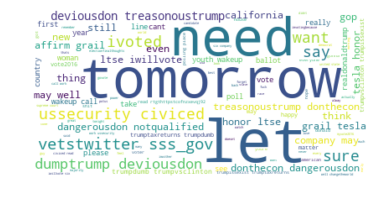

In [12]:
wordcloud = WordCloud(max_words=10000, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

There are 336599 words in the combination of all text.


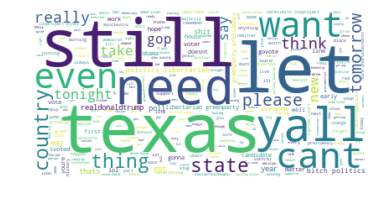

In [13]:
TX_data = New_data[New_data['user.location'].str.contains("TX")]
TX_data = TX_data.dropna(subset =['text'])# remove tweets without text
TX_data['state'] = 'TX'
text = " ".join(text for text in TX_data.text)
print ("There are {} words in the combination of all text.".format(len(text)))

wordcloud = WordCloud(max_words=10000, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

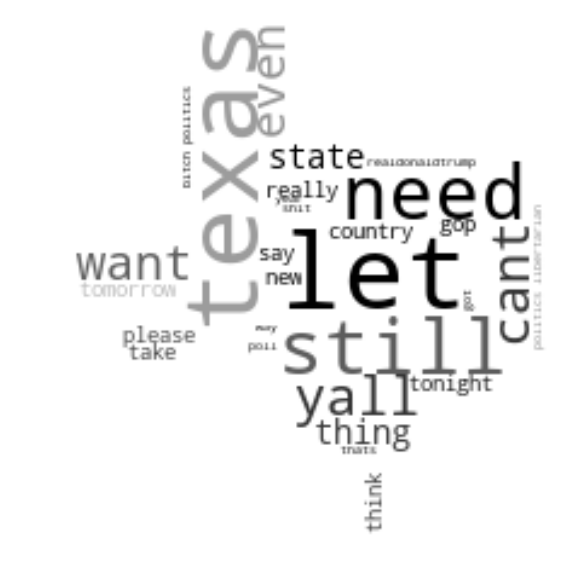

In [14]:
import cv2
mask = np.array(cv2.imread('data\TX_mask.jpg'))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               random_state=42)
wc.generate(text)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()

In [15]:
TX_data.head()

,text,created_at,geo,lang,place,coordinates,user.favourites_count,user.statuses_count,user.description,user.location,...,user.profile_background_color,user.profile_image_url,user.time_zone,id,favorite_count,retweeted,source,favorited,retweet_count,state
105,530 news8daybreak marcusmoorewfaa explains rac...,2016-11-08 11:18:16,NaN,en,NaN,NaN,2271,16183,@WFAAchannel8 producer. #SLC/Omaha native. Col...,"Dallas, TX",...,ACDED6,http://pbs.twimg.com/profile_images/7001958227...,Mountain Time (US & Canada),795948547531227140,0,False,Twitter Web Client,False,0,TX
146,guacamolly55 also mathematics minor unlikely p...,2016-11-08 04:01:51,NaN,en,NaN,NaN,9912,9546,Dogs & Tyler • Tarleton State University • ΑΟΠ...,"Stephenville, TX",...,03BDF0,http://pbs.twimg.com/profile_images/7889748692...,Central Time (US & Canada),795838718540214272,1,False,Twitter for iPhone,False,0,TX
171,httpstcof595pvtzbg,2016-11-08 04:03:41,NaN,und,"Place(id='e0060cda70f5f341', country_code='US'...",NaN,2892,3615,"Love for All,Hatred for None..An Ahmadi Muslim...","Frisco, TX",...,C0DEED,http://pbs.twimg.com/profile_images/6822201528...,NaN,795839179619966976,0,False,Twitter for iPhone,False,0,TX
277,onc_healthit sends report health progress exam...,2016-11-08 04:10:03,NaN,en,NaN,NaN,37,1814,Clinical Informaticist working to improve heal...,"Houston, TX",...,C0DEED,http://pbs.twimg.com/profile_images/5830986892...,Central Time (US & Canada),795840785656778757,0,False,Twitter Web Client,False,1,TX
325,glad mess drawing close country isnt made,2016-11-08 04:12:56,NaN,en,NaN,NaN,103,620,"Police volunteer, retired teacher, USAF vetera...","Longview, TX",...,C0DEED,http://pbs.twimg.com/profile_images/7513934483...,NaN,795841508121477121,0,False,Twitter for Android,False,0,TX


In [16]:
frames = [CA_data, TX_data]
CA_TX_data = pd.concat(frames)

In [17]:

tokenizer = TweetTokenizer(reduce_len=True)

CA_TX_data.text = CA_TX_data.text.apply(tokenizer.tokenize) 

top_words = 10000  # We'll keep these many distinct tokens and drop less frequent ones

# Tokenize using the TweetTokenizer
#CA_TX_data.text  = CA_TX_data.text.apply(tokenizer.tokenize)
# Get the word counts
fdist = FreqDist(word for text in CA_TX_data.text for word in text)
# Get top top_words terms, in order of frequency
terms = [term for term, count in fdist.most_common(top_words)]
# Replace all tokens with their rank (or 0 if not in the top top_words)
CA_TX_data.text  = CA_TX_data.text.apply(lambda text: [terms.index(term) if term in terms else 0
                                                         for term in text])


In [18]:
X_train,X_test,y_train,y_test = train_test_split(CA_TX_data.text,CA_TX_data.state, stratify = CA_TX_data.state ,test_size=0.2)
X_train = X_train.values
X_test = X_test.values
y_train = np.array((y_train == 'CA').astype(int))
y_test =  np.array((y_test== 'CA').astype(int))

In [19]:
max_review_length = 48
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 48, 32)            320000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 48, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
13459/13459 [==============================] - 16s 1ms/step - loss: 0.6395 - acc: 0.6304
Epoch 2/10
13459/13459 [=======

In [20]:
preds = np.round(model.predict(X_test).ravel())
print('Accuracy: {}'.format(str(round(accuracy_score(y_test, preds), 4))))

Accuracy: 0.6048
